# Выявление закономерностей, определяющих успешность компьютерных игр, для интернет-магазина

**Описание проекта**
Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. 

**Примечание:**
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Наша задача** — нужно выявить определяющие успешность игры закономерности.

**Результаты исследования** позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**
Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
games = pd.read_csv('/datasets/____.csv')

In [3]:
print('------ Первые 5 строк ------')
display(games.head())
print()
print('------ Типы данных ------')
games.info()
print()
print('------ Описание данных ------')
display(games.describe())
print()
print('------ Пропуски ------')
display(games.isna().sum())
print()
print('------ Дубликаты ------')
games.duplicated().sum()

------ Первые 5 строк ------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



------ Типы данных ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

------ Описание данных ------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



------ Пропуски ------


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


------ Дубликаты ------


0

В таблице всего 10 столбцов. Типы данных в столбцах — `object`, `float64`.  
Названия столбцов написаны с заглавной буквы.  
В данных выявлены пропущенные значения.
Дубликаты отсутствуют.

Необходимо устранить следующие моменты:
* тип данных в столбце `Year_of_Release` должен быть `int`;
* тип данных в столбце `User_Score` должен быть `float64`;
* привести названия столбцов к нижнему регистру.

In [4]:
# посмотрим уникальные названия платформ, жанров игр и рейтинга ESRB
display(games['Platform'].unique())
display(games['Genre'].unique())
display(games['Rating'].unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявные дубликаты отсутствуют.

## Обработка данных

In [5]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

### Обработка столбца `name`

In [6]:
# посмотрим на пропуски в столбце name
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Т.к. мы не можем определить игры, удалим строки с пропусками в названии игр.

In [7]:
games = games.dropna(subset = ['name'])

### Обработка столбца `year_of_release`

In [8]:
# посмотрим на пропуски в столбце year_of_release
games[games['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [9]:
# проверим долю строк с пропусками в столбце year_of_release
len(games[games['year_of_release'].isnull()]) / len(games) * 100

1.6095255190570215

Если отбросить данные строки, много данных не потеряется (около 1,61%).

In [10]:
games = games.dropna(subset = ['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')

### Обработка столбца `critic_score`

In [11]:
# посмотрим на пропуски в столбце critic_score
games[games['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [12]:
# проверим долю строк с пропусками в столбце critic_score
len(games[games['critic_score'].isnull()]) / len(games) * 100

51.453417659936754

Наличие пропусков не зависит от года выпуска игры. Пропусков оценок критиков слишком много (около 51,45%), их невозможно восстановить, но и удалять нельзя.

Заполнить медианой или средним значением было бы неправильно, т.к. каждая игра оценивается критиками обособленно от множества факторов, которые представленные данные не охватывают в полном объеме (например, сценарий/сюжет, качество графики, сложность прохождения и т.д.).

**Выход:** Ввести значение заглушку.

In [13]:
games['critic_score'] = games['critic_score'].replace(np.NaN, -5)
games['critic_score'] = games['critic_score'].astype('float')

### Обработка столбца `user_score`

In [14]:
# посмотрим на пропуски в столбце user_score
games[games['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-5.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-5.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-5.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-5.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-5.0,NaN,NaN


In [15]:
# проверим долю строк с пропусками в столбце user_score
len(games[games['user_score'].isnull()]) / len(games) * 100

40.166626125030405

Наличие пропусков также не зависит от года выпуска игры. Пропусков оценок критиков слишком много (около 40,17%), их невозможно восстановить, но и удалять нельзя.

Заполнить медианой или средним значением также было бы неправильно, т.к. каждая игра оценивается игроком обособленно от множества факторов, которые представленные данные не охватывают в полном объеме (например, сценарий/сюжет, качество графики, сложность прохождения и т.д.).

**Выход:** Ввести значение заглушку.

Согласно тех.заданию в столбце `user_score` имеются значения с аббревиатурой 'tbd' оценкой пользователей.

In [16]:
# посмотрим на строки со значением tbd в столбце user_score
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-5.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-5.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-5.0,tbd,E


In [17]:
# проверим долю строк со значением tbd в столбце user_score
len(games[games['user_score'] == 'tbd'])/len(games) * 100

14.449039163220629

tbd означает "To Be Determined", т.е. оценка пользователя еще не определена. По сути это означет, что в момент выгрузки данных значения оценки отсутствуют. Доля строк со значеним tbd составляет около 14,45% от общих данных, их невозможно определить, но и удалять нельзя.

**Выход:** Заменить на NaN.

In [18]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].replace(np.NaN, -5)
games['user_score'] = games['user_score'].astype('float')

In [19]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Обработка столбца `rating`

In [21]:
# посмотрим на пропуски в столбце rating
games[games['rating'].isnull()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-5.0,-5.0,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-5.0,-5.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-5.0,-5.0,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-5.0,-5.0,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-5.0,-5.0,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,-5.0,-5.0,NaN,23.09
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,-5.0,-5.0,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,-5.0,-5.0,NaN,18.24
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,-5.0,-5.0,NaN,18.14
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,-5.0,-5.0,NaN,17.28


In [22]:
# проверим долю строк с пропусками в столбце rating
len(games[games['rating'].isnull()]) / len(games) * 100

40.59839455120409

Как правило, пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей. Наличие пропусков не зависит от года выпуска игры. Пропусков рейтинга слишком много (около 40,6%), их невозможно восстановить, но и удалять нельзя.  

Причинами такого количества пропусков скорее всего является то, что игры выпускаются разработчиками разных стран, которые имеют свои рейтинговые агентства (например, в России - RARS, Европе - PEGI, Японии - CERO и т.д.) и не проходят оценку по системе ESRB, которая является американской.   

Заполнить медианой или средним значением также было бы неправильно, т.к. рейтинг присваивается каждой игре персонально.  

**Выход:** Ввести значение заглушку.

Посмотрим какие значения рейтинга имеются в представленных данных.

In [23]:
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

4 вида рейтинга встречаются часто: Е (для лиц от 6 лет и старше), Т (для лиц от 13 лет и старше), М (для лиц от 17 лет и старше) и Е10+ (для лиц от 10 лет и старше).  
Еще 4 рейтинга почти не встречаются: EC (для лиц от 3 лет и старше), K-A (для лиц от 6 лет и старше), AO (для лиц от 18 лет и старше), RP (ожидает присвоение рейтинга). 

Можно заменить редко встречающиеся рейтинги следующим образом:
- ЕС - на Е;
- К-А - на Е;
- АО - на М;
- RP - на Unknown.

In [24]:
games.loc[games['rating'] == 'AO', 'rating'] = 'M'
games.loc[games['rating'] == 'RP', 'rating'] = 'Unknown'
games.loc[games['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'

In [25]:
# проверим внесенные изменения
games['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

## Исследовательский анализ данных

### Динамика выпуска игр по годам

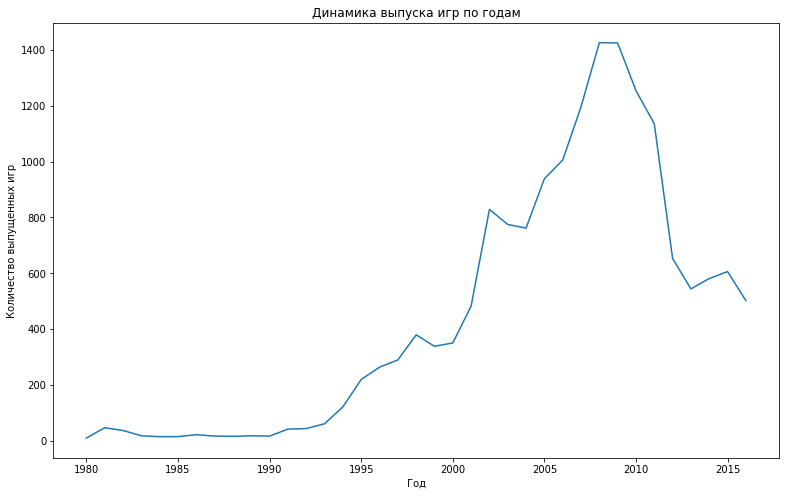

In [26]:
platform_sales = games.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
plt.figure(figsize=(13, 8))
(sns.lineplot(data = platform_sales, x = platform_sales.index, y = 'total_sales')
    .set(title = 'Динамика выпуска игр по годам', xlabel = 'Год', ylabel = 'Количество выпущенных игр'))
plt.show()

Количество выпускаемых игр стремительно росло в период с 1992 по 2008 год, максимально в год было выпущено свыше 1400 игр. С 2008 по 2016 год напротив наблюдается отрицательная динамика.  

Для построения прогноза на 2017 год наиболее актуальным будет период в 3 года с 2014 по 2016 год.

### Динамика продаж по платформам

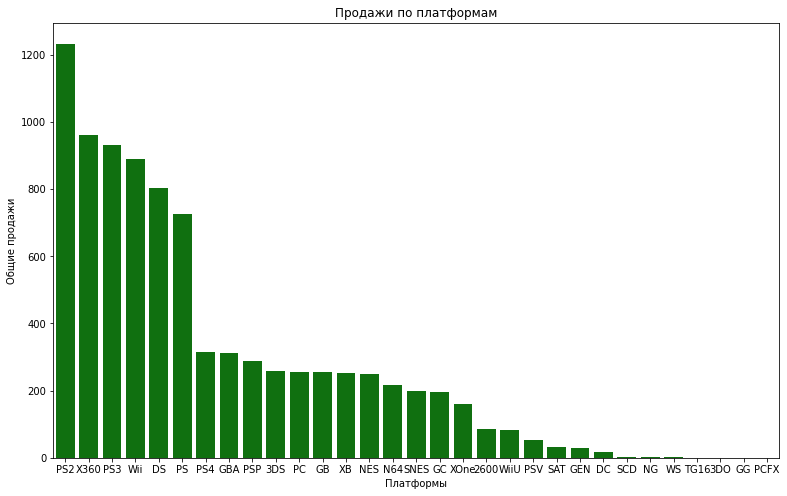

In [27]:
platform_sales = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Наибольшие суммарные продажи за весь рассматриваемый период у платформ PS2, X360, PS3, Wii, DS, PS.  
Далее построим распределение по годам по указанным платформам.

PS2


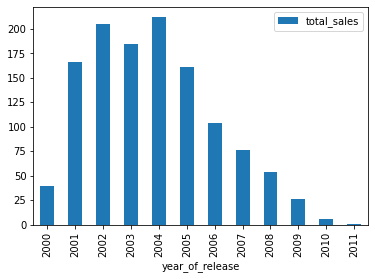

X360


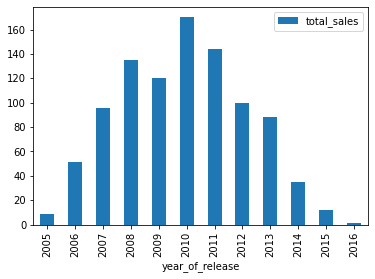

PS3


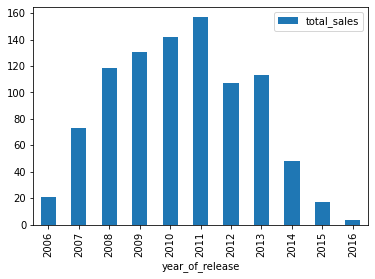

Wii


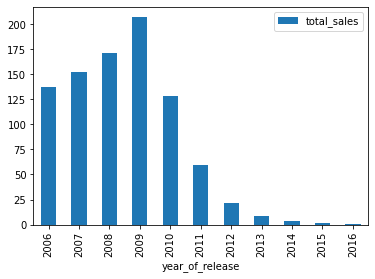

DS


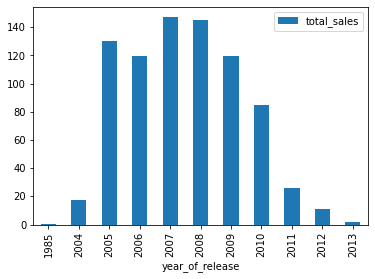

PS


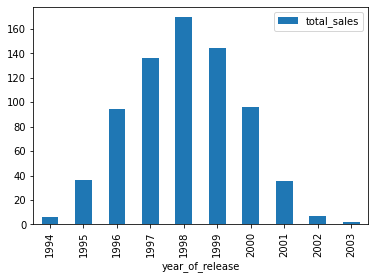

In [28]:
for platform in platform_sales.index[:6]:
    print(platform)
    (games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Несмотря на то, что по выбранным платформам были продано больше всего игр, по некоторым платформам в последние годы наблюдается отрицательная динамика, а по остальным - продажи вовсе отсутствуют.  
Период жизни платформы составляет примерно 10 лет, в течение которого наблюдается рост продаж с достижением пиковых значений на 4-6 год и последующем снижением вплоть до полного исчезновения.

### Анализ продаж по платформам за период с 2014 по 2016

In [29]:
# отрезаем старые данные
games_fresh = games.query('year_of_release >= 2014').copy()

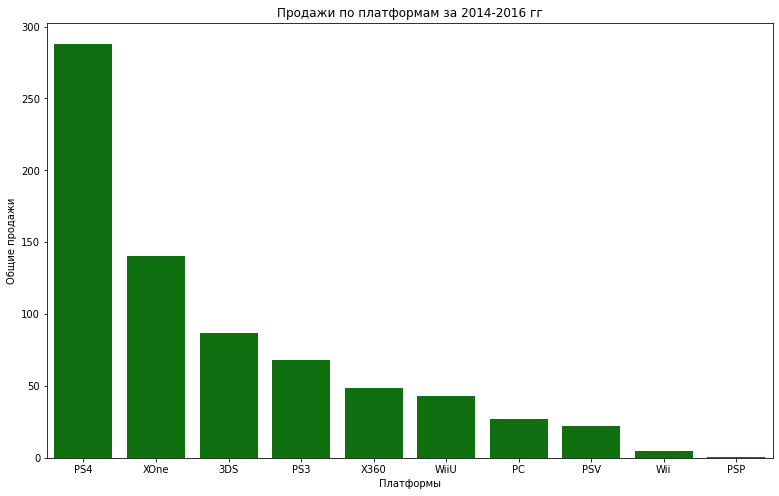

In [30]:
platform_sales_fresh = (
    games_fresh
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

PS4


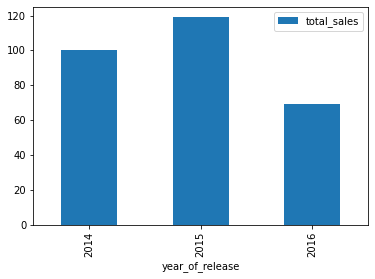

XOne


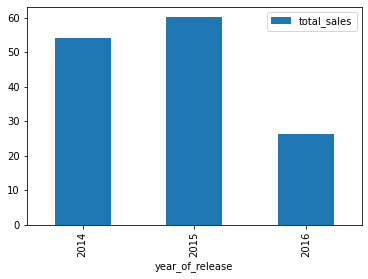

3DS


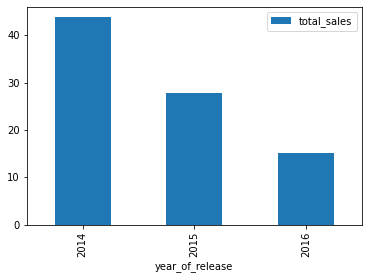

PS3


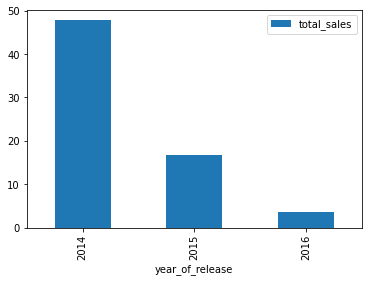

X360


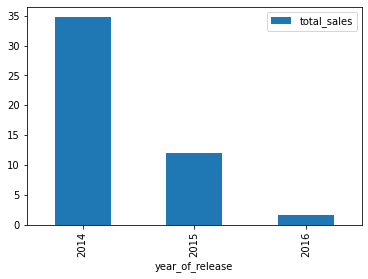

WiiU


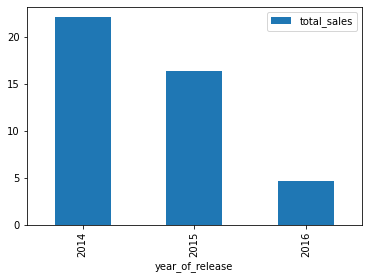

PC


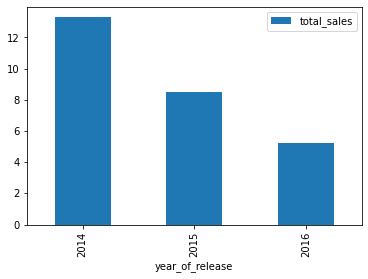

PSV


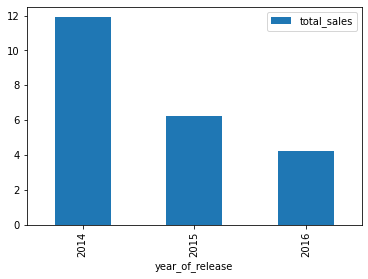

Wii


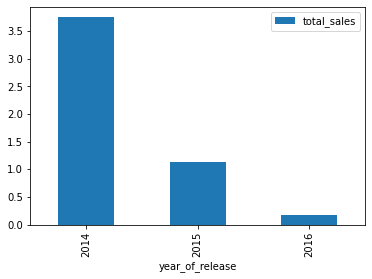

PSP


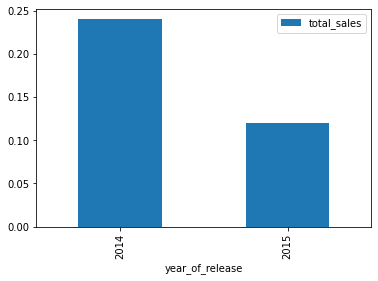

In [31]:
for platform in platform_sales_fresh.index:
    print(platform)
    (games_fresh
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Для оценки динамики продаж будем учитывать тот факт, что данные за 2016 у нас неполные (анализ проводится по состоянию на декабрь 2016, в период которого наверняка приходятся пиковые рождественкие/новогодние продажи).  


Лидерами по продажам с положительной динамикой за последние годы являются платформы PS4 и XOne.  
У остальных платформ продажи постепенно снижаются из года в год, либо вовсе отсутствуют.  

Наиболее потенциально прибыльными платформами на 2017 год являются:
- PS4, XOne - за счет суммы продаж и ее положительной динамики;
- 3DS, WiiU - несмотря на отрицательную динамику продаж, она еще не достигла дна, и сумма продаж значительно больше, чем у остальных платформ.


In [32]:
list_platform=['PS4', 'XOne', '3DS', 'WiiU']
top_games_fresh = games_fresh.query('platform in @list_platform')

### Глобальные продажи игр в разбивке по платформам

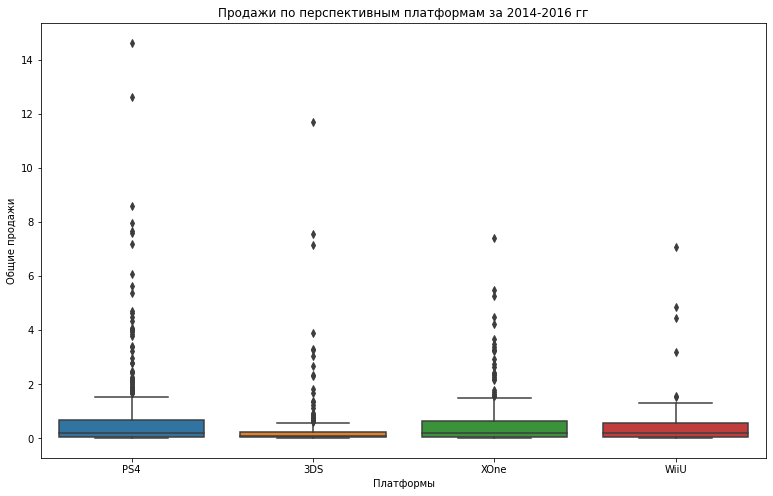

In [33]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_games_fresh, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Рассмотрим графики поближе.

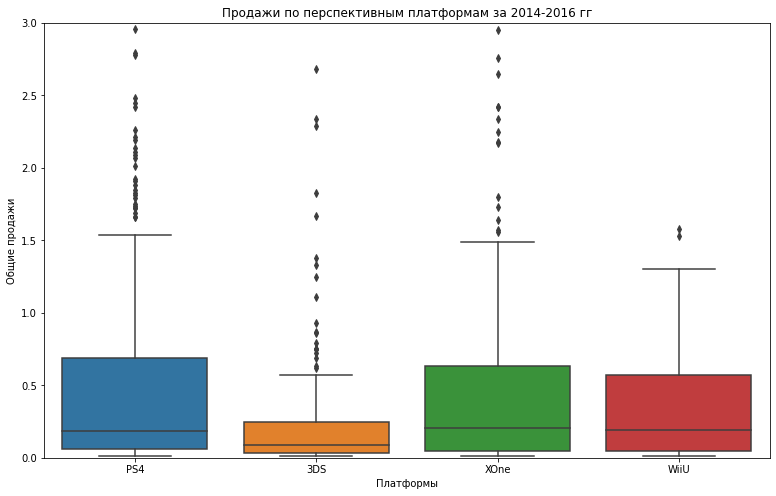

In [34]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top_games_fresh, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

У платформ PS4, XOne и WiiU примерно одинаковые диаграммы и медианы. У платформы 3DS третий квартиль намного меньше остальных.

### Влияние отзывов пользователей и критиков на продажи внутри самой популярной платформы PS4

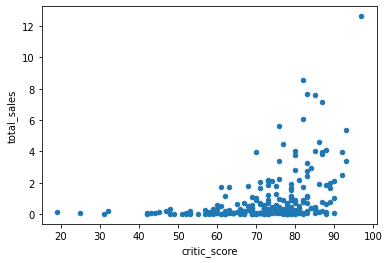

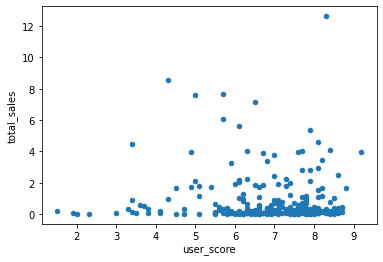

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


In [35]:
games_on_platform = games_fresh.query('platform == "PS4"')
games_on_platform[games_on_platform['critic_score'] != -5].plot(kind='scatter', x='critic_score', y='total_sales')
games_on_platform[games_on_platform['user_score'] != -5].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
print(games_on_platform[(games_on_platform['critic_score'] != -5) 
                        & (games_on_platform['user_score'] != -5)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Согласно полученным данным оценка критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.

Посмотрим также и на другие платформы.

3DS


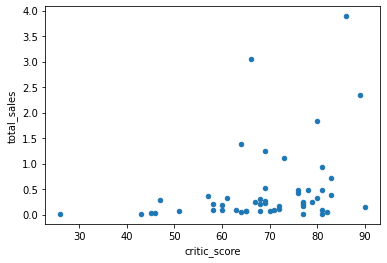

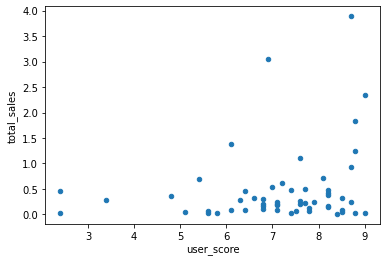

critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64
PC


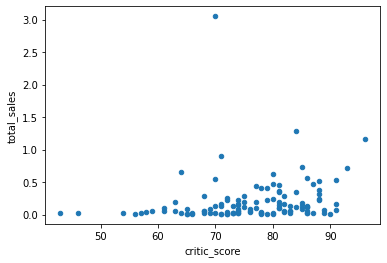

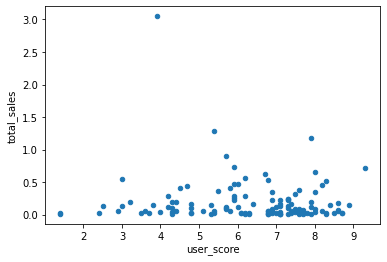

critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64
PS3


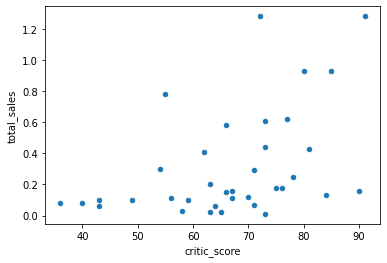

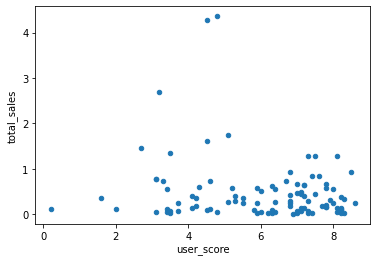

critic_score    0.446575
user_score      0.156595
total_sales     1.000000
Name: total_sales, dtype: float64
PS4


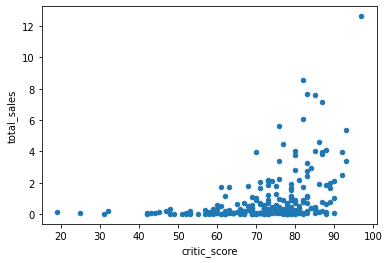

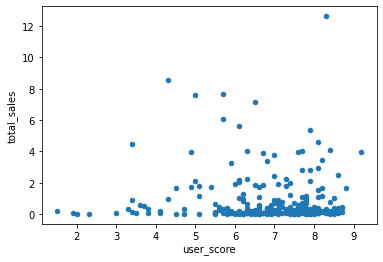

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64
PSP


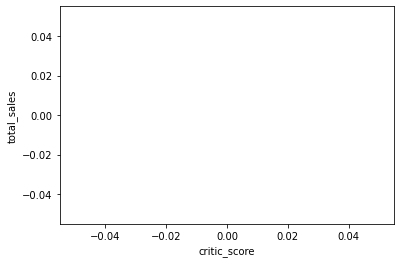

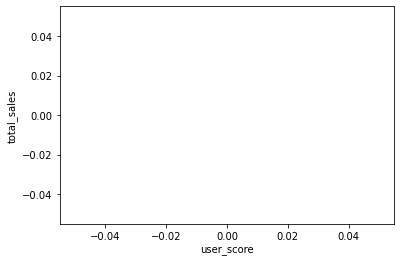

critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64
PSV


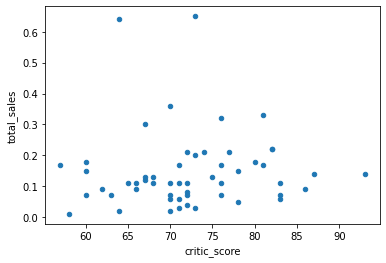

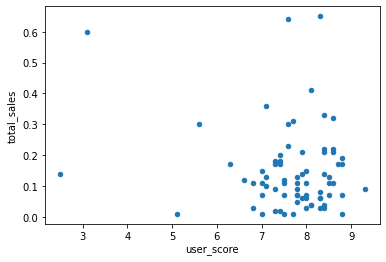

critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64
Wii


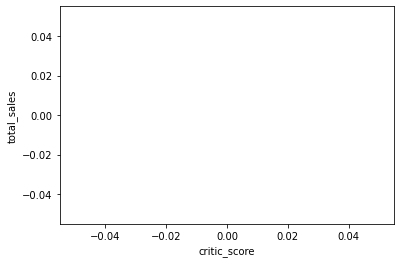

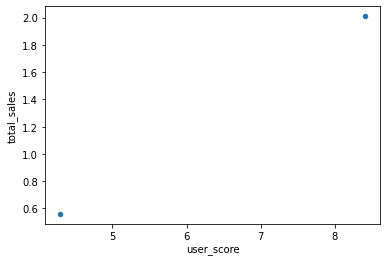

critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64
WiiU


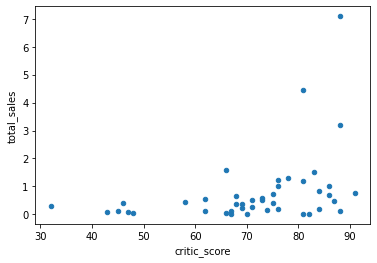

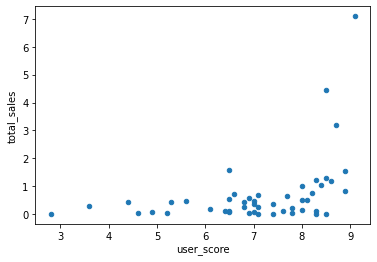

critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64
X360


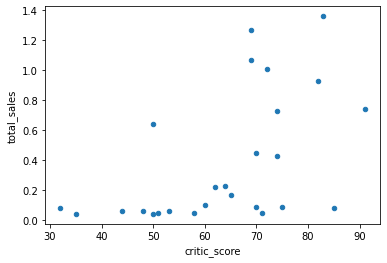

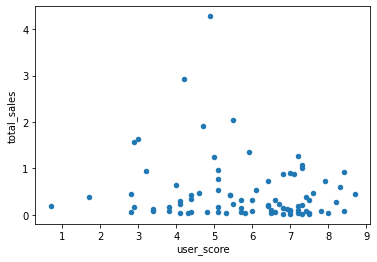

critic_score    0.525723
user_score      0.336514
total_sales     1.000000
Name: total_sales, dtype: float64
XOne


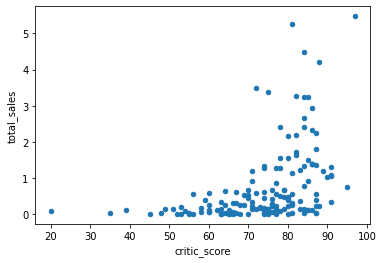

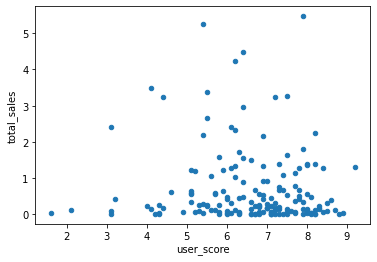

critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64


In [36]:
for platform, games_on_platform in games_fresh.groupby('platform'):
    print('='*30)
    print(platform)
    games_on_platform[games_on_platform['critic_score'] != -5].plot(kind='scatter', x='critic_score', y='total_sales')
    games_on_platform[games_on_platform['user_score'] != -5].plot(kind='scatter', x='user_score', y='total_sales')
    plt.show()
    print(games_on_platform[(games_on_platform['critic_score'] != -5) 
                        & (games_on_platform['user_score'] != -5)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Практически по всем платформам наблюдается прямая, средне-слабая корреляци между оценками критиков и продажами. А вот оценки пользователей по многим платформам корреляции с продажами не имеют. 

Наименьший коэффициент корреляции у платформы PSV.

### Общее распределение игр по жанрам

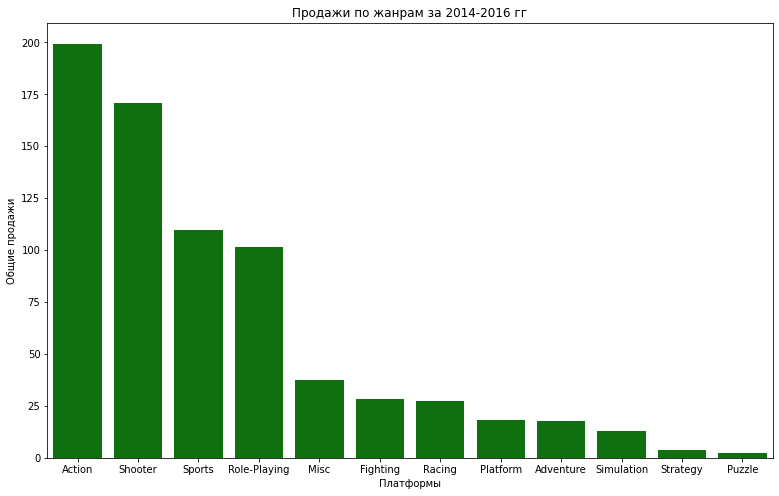

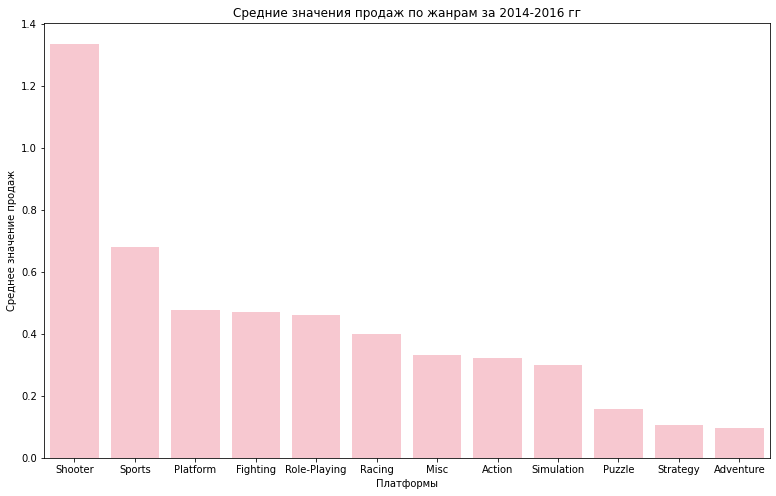

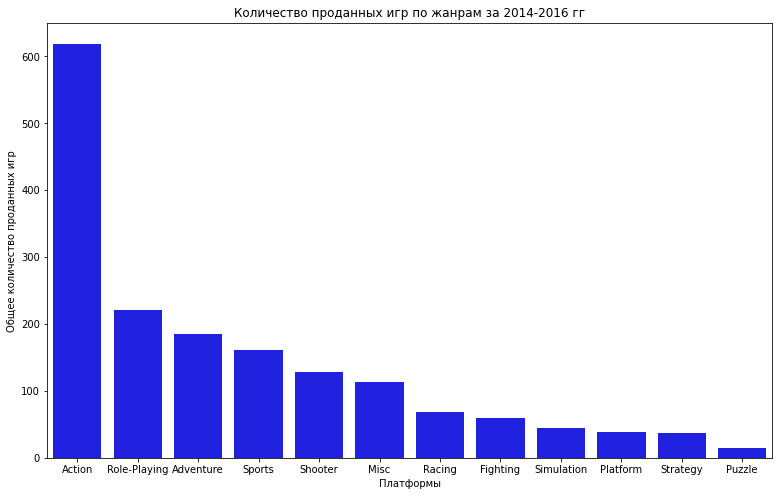

In [37]:
#посчитаем суммарные продажи по жанрам
platform_sales_fresh = (
    games_fresh
    .pivot_table(index='genre', values='total_sales', aggfunc= 'sum')
    .sort_values('total_sales', ascending=False)
)

#посчитаем среднее значение продаж по жанрам
platform_sales_mean_fresh = (
    games_fresh
    .pivot_table(index='genre', values='total_sales', aggfunc= 'mean')
    .sort_values('total_sales', ascending=False)
)

#посчитаем количество проданных игр по жанрам
platform_sales_count_fresh = (
    games_fresh
    .pivot_table(index='genre', values='name', aggfunc= 'count')
    .sort_values('name', ascending=False)
)

#построим график суммарных продаж по жанрам
plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh,
             x = platform_sales_fresh.index,
             y = 'total_sales',
             color = 'green')
    .set(title = 'Продажи по жанрам за 2014-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи'))

#построим график средних продаж по жанрам
plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_mean_fresh,
             x = platform_sales_mean_fresh.index,
             y = 'total_sales',
             color = 'pink')
    .set(title = 'Средние значения продаж по жанрам за 2014-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Среднее значение продаж'))

#построим график количества проданных игр по жанрам
plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_count_fresh,
             x = platform_sales_count_fresh.index,
             y = 'name',
             color = 'blue')
    .set(title = 'Количество проданных игр по жанрам за 2014-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Общее количество проданных игр'))

plt.show()

Согласно полученным данным несмотря на то, что больше всего продано игр жанра Action (как по суммам продаж, так и по количеству), наиболее дорогим является жанр - Shooter, т.к. среднее значение продаж более чем в 2 раза выше других.  

На 2-ом месте - жанр Sports.   

Самые дешевые игры жанров Strategy и Adventure.

## Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)

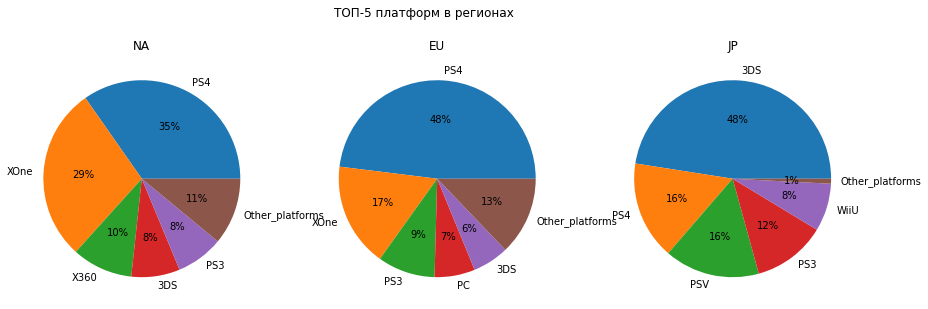

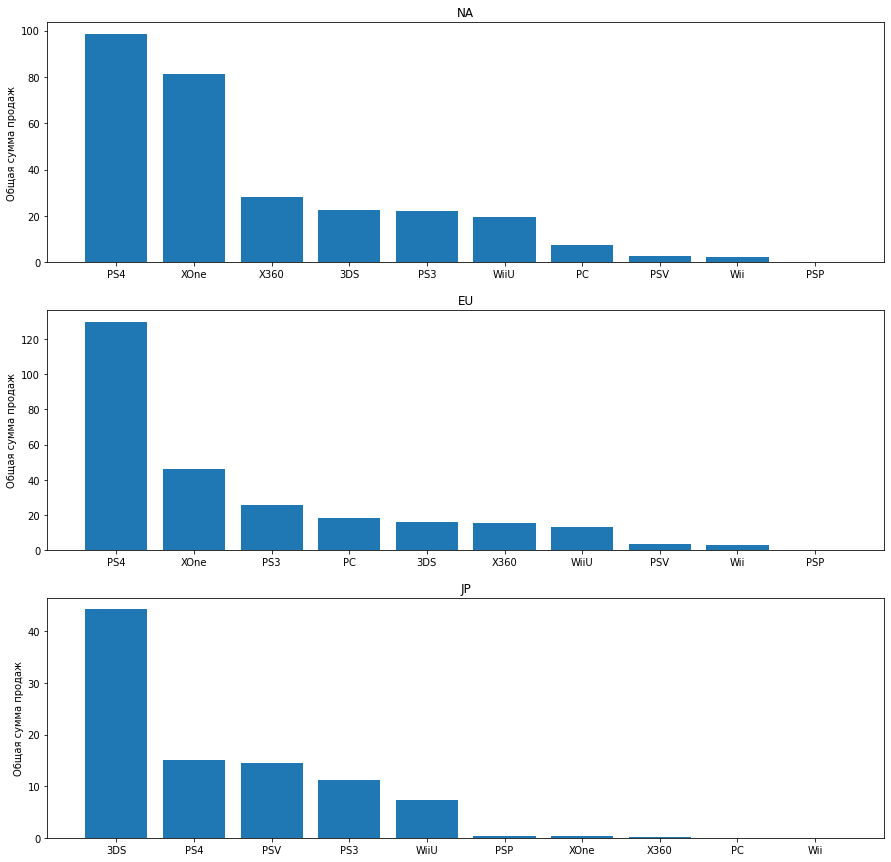

In [38]:
# задаем список регионов
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')

for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (games_fresh.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальные продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms',
                      countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()},
                     ignore_index= True)

  axs[i].pie(df_i[countries[i]], labels = df_i['platform'],
             autopct=lambda percent: "{:.0f}%".format(percent), shadow=False)
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())

# начертим столбчатую диаграмму для каждого региона
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

for i in range(3):
  df_i = (games_fresh.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))
  axs[i].bar(df_i['platform'], df_i[countries[i]])
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
  axs[i].set(ylabel='Общая сумма продаж')
plt.show()

Тот-5 популярных платформ в **Северной Америке** и **Европе** охватывает более 87% рынка, а в **Японии** - около 99 % рынка.  
Наиболее популярные платформы в **Северной Америке** и **Европе** совпадают - это PS4 и XOne, которые суммарно в обоих регионах занимают 64-65% от продаж.  
В **Японии** самой популярной платформой является 3DS, который занимает 48% доли рынка. На втором и третьем месте платформы PS4 и PSV с долями по 16%. Всего топ-3 платформы в **Японии** занимают 80% от продаж.

### Самые популярные жанры (топ-5)

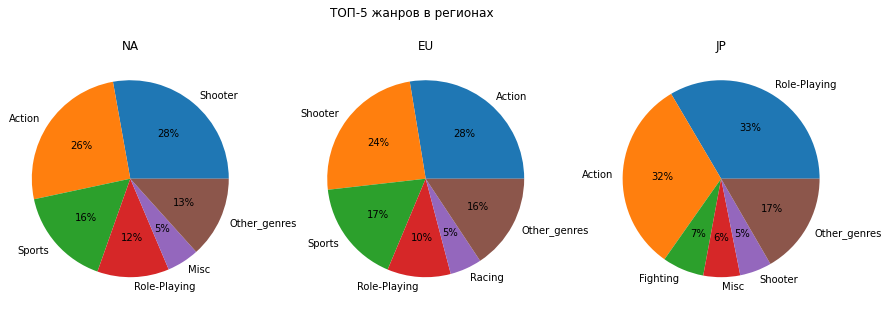

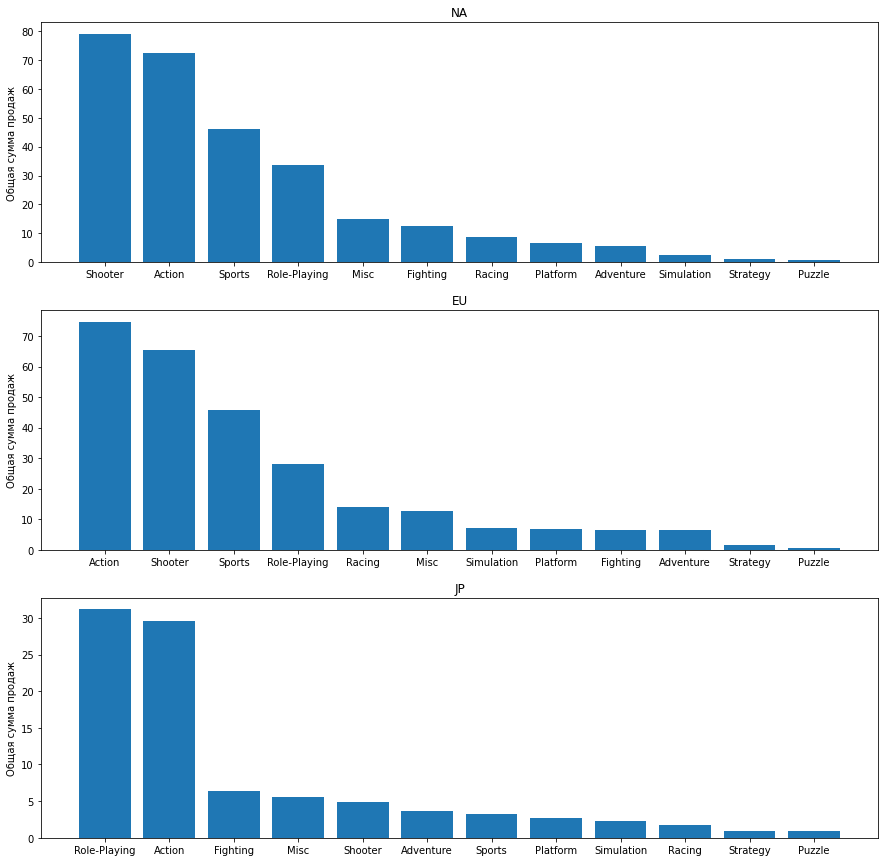

In [39]:
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')

for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальные продажи в Other_genres
  df_i = df_i.append({'genre': 'Other_genres',
                      countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()},
                     ignore_index= True)
  #посчитаем общую сумму продаж
  total_income = games_fresh[countries[i]].sum()

  axs[i].pie(df_i[countries[i]], labels = df_i['genre'],
             autopct=lambda percent: "{:.0f}%".format(percent), shadow=False)
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())

# начертим столбчатую диаграмму для каждого региона
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

for i in range(3):
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))
  axs[i].bar(df_i['genre'], df_i[countries[i]], )
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
  axs[i].set(ylabel='Общая сумма продаж')
plt.show()

Топ-5 популярных жанров во **всех регионах** охватывает более 83% рынка.  
Наиболее популярные жанры в **Северной Америке** и **Европе** совпадают - это Action и Shooter, которые суммарно в обоих регионах занимают 52-54% от продаж. Не менее популярны игры с жанрами Sports с долей 16-17% и Role-playing с долей 10-12%.   
Наиболее популярные жанры в **Японии** - это Role-Playing и Action, которые суммарно занимают 64% от продаж.  
Разницу в жанрах можно объяснить популярностью портативных игровых платформ в Японии (3DS и PSV), которые в сумме занимают 64% продаж.

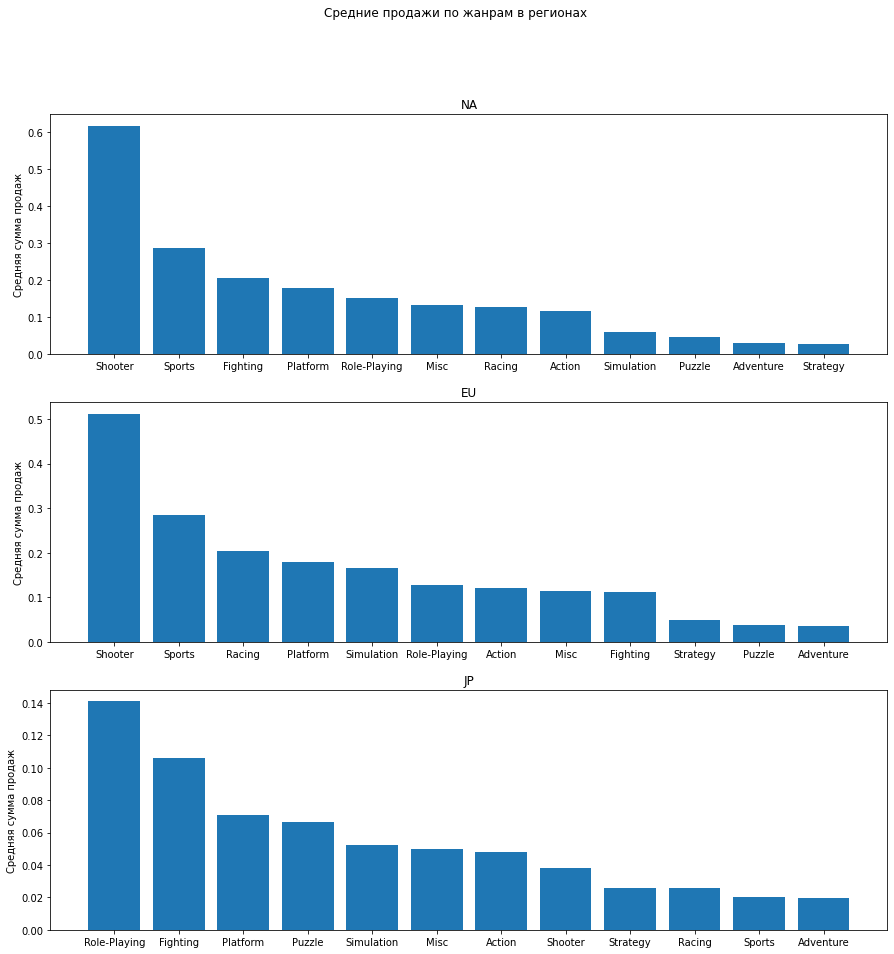

In [40]:
# начертим столбчатую диаграмму для каждого региона
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Средние продажи по жанрам в регионах')

for i in range(3):
  df_i = (games_fresh.groupby('genre')[countries[i]].mean().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))
  axs[i].bar(df_i['genre'], df_i[countries[i]], )
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
  axs[i].set(ylabel='Средняя сумма продаж')
plt.show()

Наиболее дорогие жанры в **Северной Америке** и **Европе** совпадают - это Shooter, средние продажи которого значительно выше остальных. На 2-ом месте - жанр Sports.  
А жанр Action занимает 7-8 места. Получается лидерство данного жанра по общей сумме продаж достигается за счет бОльшего количества выпускаемых игр.  

Наиболее дорогие жанры в **Японии** - это Role-Playing, далее Fighting.

### Влияние рейтинга ESRB на продажи в отдельном регионе¶

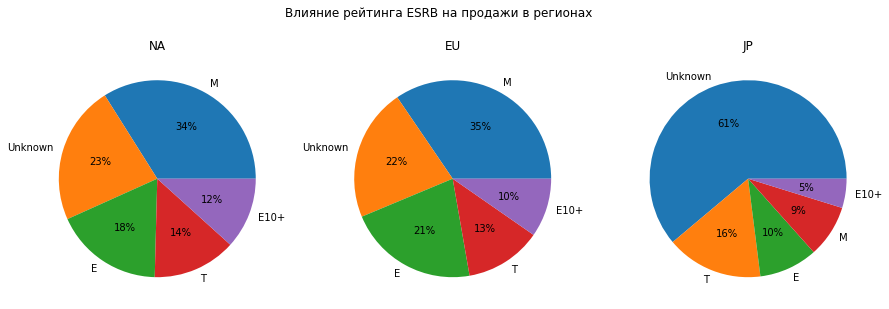

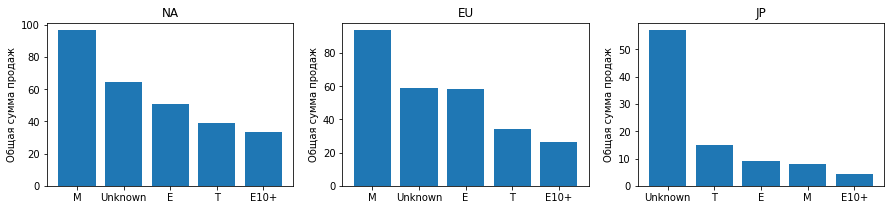

In [41]:
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')

for i in range(3):
  df_i = (games_fresh.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))

  axs[i].pie(df_i[countries[i]], labels = df_i['rating'],
             autopct=lambda percent: "{:.0f}%".format(percent),
             shadow=False)
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
    
# начертим столбчатую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for i in range(3):
  df_i = (games_fresh.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))
  axs[i].bar(df_i['rating'], df_i[countries[i]], )
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
  axs[i].set(ylabel='Общая сумма продаж')
plt.show()

В **Северной Америке** и **Европе** продажи по рейтингам практически идентичны. Больше всего продано игр с рейтингом M (для лиц от 17 лет и старше), далее игры без рейтинга, на третьем месте - игры с рейтингом E (для лиц от 6 лет и старше).  
В **Японии** иначе: первое место занимают игры без рейтинга. Скорее всего данный феномен объясняется тем, что в Японии наиболее популярны игры, выпущенные для внутреннего рынка и которые не проходят рейтингование по американской системе ESRB.  
Далее на втором месте в **Японии** идут игры с рейтингом Т (для лиц от 13 лет и старше), а на третьем - с рейтингом E (для лиц от 6 лет и старше).   

**Вывод**  
Портреты игроков в Северной Америке и Европе совпадают - это пользователь старше 17 лет, который играет в Action или Shooter на платформе PS4 или XOne.  
Портрет игрока в Японии - это пользователь старше 13 лет, который играет в Role-Playing или Action на платформе 3DS, PS4 или PSV.  

## Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые¶

Н0 (нулевая гипотеза) - Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.

Н1 (альтернативная гипотеза) - Средние пользовательские рейтинги платформ Xbox One и PC **не одинаковые**.

Дисперсии выборок были расчитаны выше, они отличаются более чем на 5%.

Выборки независимы, поэтому используем функцию ttest_ind.

In [42]:
# удаляем значения-заглушки
games_with_score = games_fresh[games_fresh['user_score'] != -5]

print('Средний пользовательский рейтинг платформ Xbox One', round(games_with_score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(games_with_score.query('platform == "PC"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    games_with_score.query('platform == "XOne"')['user_score'], 
    games_with_score.query('platform == "PC"')['user_score'], 
    equal_var=False)
alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Средний пользовательский рейтинг платформ Xbox One 6.59
Средний пользовательский рейтинг платформ PC 6.3

p-значение: 0.11601398086668827
Опровергнуть нулевую гипотезу нельзя


p-значение достаточно высоко, что не дает основание отвергнуть предположение об отсутствии различий между средними пользовательскими рейтингами платформ Xbox One и PC.

У игр на Xbox One средние пользовательские рейтинги незначительно выше, чем на PC.

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

Н0 (нулевая гипотеза) - Средние пользовательские рейтинги жанров Action и Sports **одинаковые**.

Н1 (альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action и Sports **не одинаковые**.

Дисперсии выборок были расчитаны выше, они отличаются более чем на 5%.

Выборки независимы, поэтому используем функцию ttest_ind.

In [43]:
print('Средний пользовательский рейтинг жанра Action', round(games_with_score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(games_with_score.query('genre == "Sports"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    games_with_score.query('genre == "Action"')['user_score'], 
    games_with_score.query('genre == "Sports"')['user_score'], 
    equal_var=False)
alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Средний пользовательский рейтинг жанра Action 6.76
Средний пользовательский рейтинг жанра Sports 5.23

p-значение: 1.1825550382644557e-14
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между средними пользовательскими рейтингами жанров Action и Sports.

У игр жанра Action средние пользовательские рейтинги значительно выше, чем у жанра Sports.

## Общий вывод

По итогам проведенного анализа установлено, что между представленными регионами Северная Америка, Европа и Япония имеются различия в наиболее популярных платформах, жанрах игр и рейтингах ERSB.   
Следует отметить, что оценка критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.

С учетом выявленных различий рекомендуется планировать рекламные кампании отдельно для Северной Америки и Европы и отдельно для Японии:
- потенциально популярный продукт в Северной Америке и Европе:
  - Платформы: PS4, XOne;
  - Жанр: Shooter;
  - рейтинг ESRB: M;

- потенциально популярный продукт в Японии:
  - Платформа: 3DS, PS4 и PSV;
  - Жанр: Role-Playing;
  - рейтинг ESRB: T.